# Computational assignment 2

# TO DO 
- fiks plotting oppgave 1
- få til overdamped (analytisk stemmer ikke med numerisk)
- skriv om hvordan vi finner C for critical damping (initialbetingelsen omega0 = 0)
- skriv om analytisk løsning 
- Plotte energitap (work done by damping)
- kommenter oppgave 1

- hele oppgave 2


## 1) Damped harmonic motion of a pendulum


# må sikkert skrive om utleding av analytisk løsning??

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc

In [2]:
"""Ville ta inn q som en parameter i funksjonen f, vet ikke hvordan dette løses best. 
Derfor definerer jeg Kutta4 på nytt som en midlertidig løsning"""

def Kutta4(f,t0,y0,h,nsteps,q):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values
    
    T=np.linspace(t0, t0 + h*nsteps, nsteps) #array of time values 
    
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q)
        F2= f(Y[i] + h/2* F1,t,q)
        F3= f(Y[i] + h/2* F2,t,q)
        F4= f(Y[i] + h*F3,t,q)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list

6.2631142413339385


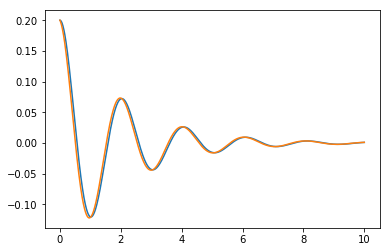

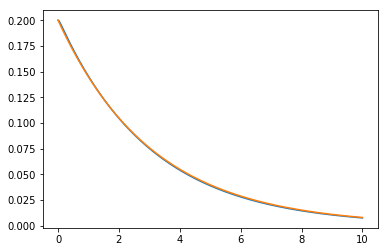

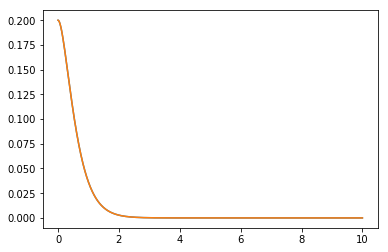

In [3]:
#default value of the damping parameter  ?????? trenger kanskje ikke denne, men den er oppgitt i oppgaven
q0=1 

#constants and initial values 
delta_t=0.01 #?????????Hvilken verdi skal vi bruke????
nsteps =int(10/delta_t)   #??????Hvilken verdi skal vi bruke her da????
theta0 = 0.2
omega0 =0 
x0 = np.array([theta0,omega0])
g=sc.g
l=1


"""faseforskyvning?????"""
phi = np.pi/2


def f_damped(w,t,q):
    return np.array([w[1],-g/l*w[0]-q*w[1]])


"""Bare en første test"""
#x_rk, t =  Kutta4(f2,0,x0,delta_t,nsteps,q)
#theta_damped = x_rk[:,0] 
#plt.plot(t,theta_damped)
#plt.show()
    

print(np.sqrt(4*g/l))

def plot_damped(q,analytic_sol): #sett sikkert inn flere parametre her
    x,t = Kutta4(f_damped,0,x0,delta_t,nsteps,q)
    theta=x[:,0]
    
    theta_a=analytic_sol(t,q)
    
    plt.plot(t,theta)
    plt.plot(t,theta_a)
    plt.show()
    
def analytic_sol_u(t,q):
    return theta0 * np.exp(-q*t/2) * np.sin(np.sqrt(g/l - q**2/4)*t + phi )
    
def analytic_sol_o(t,q):  ##pluss eller minus???????????????
    exp_fact= (q/2 - np.sqrt(q**2/4 + g/l))
    return theta0 * np.exp(exp_fact*t)
    return theta0 * np.exp(-(q/2 - np.sqrt(q**2/4 + g/l))*t)
    #return theta0 * np.exp( -(q/2 + np.sqrt(q**2/4 + g/l))*t)

def analytic_sol_c(t,q): ###Hva er C ???????????????????
    C=theta0*q/2   #hva i all verden er denne????
    return (theta0 + C*t ) * np.exp(-q*t/2)
    
"""Underdamped  q^2 < 4g/l  """
q_u=1
plot_damped(q_u,analytic_sol_u)

"""Overdamped q^2>4g/l"""
q_o=30
plot_damped(q_o,analytic_sol_o)


"""Critically damped q"""
q_c=np.sqrt(4*g/l)
plot_damped(q_c,analytic_sol_c)


## 2) Forced harmonic (damped) pendulum 

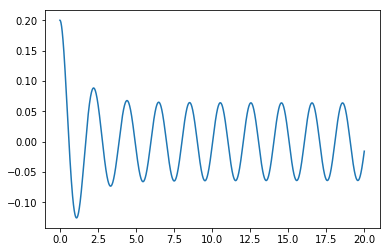

3.1315571206669692


In [10]:
#default value for driving force
nsteps_f= int(20/delta_t)
Fd = 0.2
Omega_D = np.sqrt(g/l)  #prøvde å sette den til resonansfrekvensen
q0=1

def f_forced(w,t,q):
    return np.array([w[1],-q*w[1]-(g/l)*w[0]+Fd*np.sin(Omega_D*t+phi)])


x_forced, t = Kutta4(f_forced,0,x0,delta_t,nsteps_f,q0)
theta_forced=x_forced[:,0]

plt.plot(t,theta_forced)
plt.show()

print(Omega_D)
Omega_D_list=[0,1,3,5,10]

for i in range(len(Omega_D_list)):
    

In [5]:
"""Dependence of Omega_D"""

#skal finne resonans amplituden
def resonance_amplitude(theta_list):
    midle_of_list= int(nsteps_f/2)
    return np.max(theta_list[midle_of_list:])
    
list_of_omega_D = np.linspace(0,10,30) 
amplitudes_omega_D=np.zeros(len(list_of_omega_D))

for i in range(len(list_of_omega_D)):
    x_i ... = Kutta4(f_forced,0,x0,delta_t,nsteps)
    theta_i = x_i[:,0]
    amplitude_omega_D[i] = resonace_amplitude(theta_i)

plt.plot(list_of_omega_D,amplitudes_omega_D)
    

SyntaxError: invalid syntax (<ipython-input-5-a532b7aba2af>, line 12)